In [7]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.parse import urlencode 

## Загрузка и обработка данных через API Яндекс.Метрики с демо 

##### Создаем url-адресс для запроса интересующей информации (дата, тип посетителя, количество посещений)

In [37]:
metrics = 'metrics=ym:s:visits'
group_by_1 = 'dimensions=ym:s:date'
group_by_2 = 'dimensions=ym:s:isRobot'
demo_id_num = 'id=44147844'
date1 = 'date1=2022-04-16'
date2 = 'date2=2022-04-19'

base_url = 'https://api-metrika.yandex.net/stat/v1/data?'
url = f'{base_url}{date1}&{date2}&{metrics}&{group_by_1}&{group_by_2}&{demo_id_num}&' 
url

'https://api-metrika.yandex.net/stat/v1/data?date1=2022-04-16&date2=2022-04-19&metrics=ym:s:visits&dimensions=ym:s:date&dimensions=ym:s:isRobot&id=44147844&'

##### С помощью библиотеки requests формируем запрос на получение информации по созданному URL

In [38]:
response = requests.get(url).text

##### С помощью библиотеки json, трансформируем полученный ответ из формата текст к формату json

In [39]:
result = json.loads(response)

In [40]:
result

{'query': {'ids': [44147844],
  'dimensions': ['ym:s:date', 'ym:s:isRobot'],
  'metrics': ['ym:s:visits'],
  'sort': ['-ym:s:visits'],
  'date1': '2022-04-16',
  'date2': '2022-04-19',
  'limit': 100,
  'offset': 1,
  'group': 'Week',
  'auto_group_size': '1',
  'attr_name': '',
  'quantile': '50',
  'offline_window': '21',
  'attribution': 'LastSign',
  'currency': 'RUB',
  'adfox_event_id': '0'},
 'data': [{'dimensions': [{'name': '2022-04-19'},
    {'name': 'People', 'id': 'no'}],
   'metrics': [966.0]},
  {'dimensions': [{'name': '2022-04-18'}, {'name': 'People', 'id': 'no'}],
   'metrics': [881.0]},
  {'dimensions': [{'name': '2022-04-17'}, {'name': 'People', 'id': 'no'}],
   'metrics': [422.0]},
  {'dimensions': [{'name': '2022-04-16'}, {'name': 'People', 'id': 'no'}],
   'metrics': [397.0]},
  {'dimensions': [{'name': '2022-04-19'}, {'name': 'Robots', 'id': 'yes'}],
   'metrics': [62.0]},
  {'dimensions': [{'name': '2022-04-17'}, {'name': 'Robots', 'id': 'yes'}],
   'metrics': [

##### Производим обработку и вычленение необходимых данных из json словаря:

In [41]:
data = [(i['dimensions'][0]['name'], i['dimensions'][1]['name'], i['metrics'][0]) for i in result['data']]

##### Создаем датафрейм на основании полученных данных:

In [42]:
df = pd.DataFrame(data, columns=['date', 'user_type', 'visits']) \
        .sort_values('date')
df.date = pd.to_datetime(df['date'], format="%Y/%m/%d").dt.date

In [43]:
df

,date,user_type,visits
3,2022-04-16,People,397.0
7,2022-04-16,Robots,27.0
2,2022-04-17,People,422.0
5,2022-04-17,Robots,47.0
1,2022-04-18,People,881.0
6,2022-04-18,Robots,47.0
0,2022-04-19,People,966.0
4,2022-04-19,Robots,62.0


##### Загрузка учебного датафрейма

In [44]:
df_edu = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/Homework/lesson_7/step_1_lesson_7.csv', parse_dates=['date'])

In [45]:
df_edu.date = df_edu.date.dt.date
df_edu

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


### Построим график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

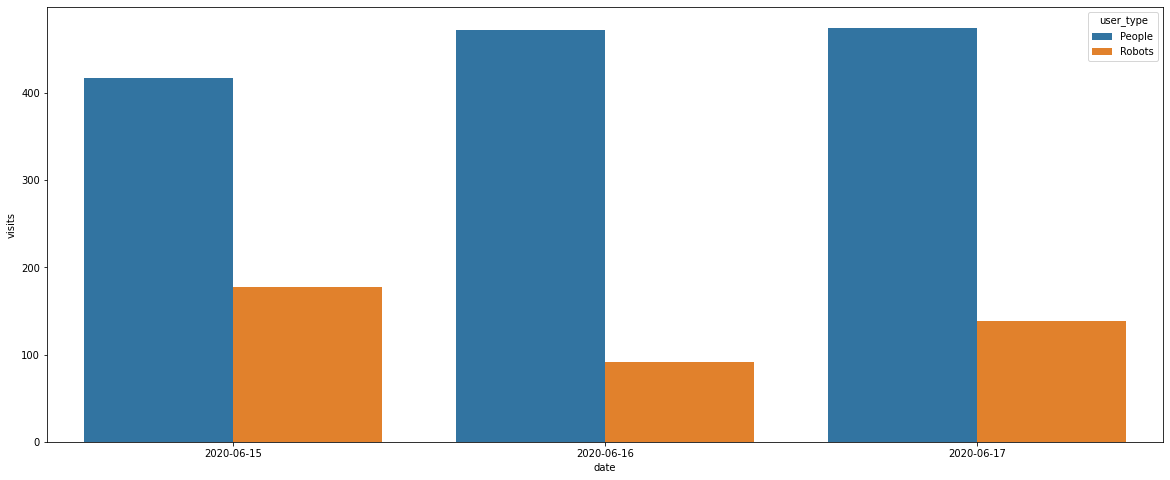

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x="date", y="visits", hue="user_type", data=df_edu)

## Определим процент использования браузера google Chrome, среди пользователей, посетивших страницу:

##### Creating URL and making request

In [47]:
url_chrome_stat = 'https://api-metrika.yandex.net/stat/v1/data?date1=2022-04-16&date2=2022-04-19&metrics=ym:s:visits&dimensions=ym:s:date&dimensions=ym:s:browser&id=44147844' 
response_result = requests.get(url_chrome_stat).text

##### Creating json-formatted file from response

In [48]:
browser_usage_json = json.loads(response_result)
browser_usage_json['data']

[{'dimensions': [{'name': '2022-04-19'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [540.0]},
 {'dimensions': [{'name': '2022-04-18'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [489.0]},
 {'dimensions': [{'name': '2022-04-17'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [203.0]},
 {'dimensions': [{'name': '2022-04-19'},
   {'icon_id': '70',
    'icon_type': 'browser',
    'name': 'Yandex Browser',
    'id': '70'}],
  'metrics': [178.0]},
 {'dimensions': [{'name': '2022-04-18'},
   {'icon_id': '70',
    'icon_type': 'browser',
    'name': 'Yandex Browser',
    'id': '70'}],
  'metrics': [154.0]},
 {'dimensions': [{'name': '2022-04-16'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [152.0]},
 {'dimensions': [{'name': '2022-04-17'},
   {'

##### Required data parsing

In [49]:
browser_usage_data = [
    (
        i['dimensions'][0]['name'],
        i['dimensions'][1]['name'],
        i['metrics'][0]
    ) for i in browser_usage_json['data']
]

##### Creating DataFrame

In [50]:
browser_usage_df = pd.DataFrame(browser_usage_data, columns=['date', 'browser', 'visits'])
browser_usage_df.date = browser_usage_df.date.astype('datetime64[ns]')
browser_usage_df = browser_usage_df.sort_values('date')
browser_usage_df

,date,browser,visits
27,2022-04-16,Android Browser,15.0
49,2022-04-16,Firefox Mobile,2.0
55,2022-04-16,MSIE,1.0
46,2022-04-16,Huawei Browser,3.0
45,2022-04-16,Samsung Internet,3.0
...,...,...,...
12,2022-04-19,Firefox,57.0
10,2022-04-19,Edge,64.0
3,2022-04-19,Yandex Browser,178.0
48,2022-04-19,MQQBrowser,3.0


##### Creating alternative DataFrame by using suggested dataset

In [51]:
edu_browser_usage_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/Homework/lesson_7/step_2_lesson_7.csv', parse_dates = ['date'])
edu_browser_usage_df

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [52]:
edu_browser_usage_df.browser.str.contains('Chrome').sum()


2

##### Determination of chrome browser usage percentage

In [53]:
# Downloaded metrika dataset
chrome_percentage = round((browser_usage_df.query('browser == "Google Chrome"').visits.sum() / browser_usage_df.visits.sum()) * 100)
# Recieved edu dataset
chrome_percentage_edu = round((edu_browser_usage_df.query('browser == "Google Chrome"').visits.sum() / edu_browser_usage_df.visits.sum()) * 100)

In [54]:
print(f'chrome_percentage: {chrome_percentage}\nchrome_percentage_edu: {chrome_percentage_edu}')

chrome_percentage: 49
chrome_percentage_edu: 60


## Выясним, с какого браузера приходит больше всего ботов.

##### Creating URL and making request

In [55]:
url_chrome_stat = 'https://api-metrika.yandex.net/stat/v1/data?date1=2022-04-16&date2=2022-04-19&metrics=ym:s:visits&dimensions=ym:s:date&dimensions=ym:s:isRobot&dimensions=ym:s:browser&id=44147844' 
response_result = requests.get(url_chrome_stat).text

##### Creating json-formatted file from response

In [56]:
browser_usage_json = json.loads(response_result)
browser_usage_json['data']

[{'dimensions': [{'name': '2022-04-19'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [505.0]},
 {'dimensions': [{'name': '2022-04-18'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [464.0]},
 {'dimensions': [{'name': '2022-04-17'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [174.0]},
 {'dimensions': [{'name': '2022-04-19'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '70',
    'icon_type': 'browser',
    'name': 'Yandex Browser',
    'id': '70'}],
  'metrics': [167.0]},
 {'dimensions': [{'name': '2022-04-16'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [145.0]},
 {'dimensions': [{'name': '2022-

##### Required data parsing

In [57]:
browser_user_data = [
    (
        i['dimensions'][0]['name'],
        i['dimensions'][1]['name'],
        i['dimensions'][2]['name'],
        i['metrics'][0]
    ) for i in browser_usage_json['data']
]

##### Creating DataFrame

In [58]:
browser_user_df = pd.DataFrame(browser_user_data, columns=['date', 'user', 'browser', 'visits'])
browser_user_df.date = browser_user_df.date.astype('datetime64[ns]')
browser_user_df = browser_user_df.sort_values('date')
browser_user_df

,date,user,browser,visits
48,2022-04-16,Robots,Yandex Browser,6.0
32,2022-04-16,People,Opera,13.0
34,2022-04-16,People,Android Browser,12.0
36,2022-04-16,People,Mobile Safari,11.0
75,2022-04-16,People,MIUI,1.0
...,...,...,...,...
55,2022-04-19,People,MIUI,4.0
61,2022-04-19,Robots,Chrome Mobile,3.0
69,2022-04-19,People,MQQBrowser,2.0
71,2022-04-19,Robots,Android Browser,2.0


In [59]:
browser_user_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/Homework/lesson_7/step_3_lesson_7.csv', parse_dates = ['date'])
browser_user_df = browser_user_df.rename(columns={'user_type': 'user'})

In [60]:
browser_user_df.query('user == "Robots"') \
                .groupby(['browser'], as_index=False) \
                .agg({'visits': 'sum'}) \
                .sort_values('visits', ascending=False)

,browser,visits
3,Google Chrome,104.0
2,Firefox,31.0
6,Safari,22.0
9,Yandex Browser,7.0
5,Opera,5.0
8,UCWEB,4.0
0,Chromium,1.0
1,Edge,1.0
4,Mobile Safari,1.0
7,Samsung Internet,1.0


In [61]:
grouped_by_browser = browser_user_df.groupby(['browser'], as_index=False) \
                                    .agg({'visits': 'sum'}) \
                                    .sort_values('visits', ascending=False)

In [62]:
browser_user_probe = browser_user_df.groupby(['browser', 'user'], as_index=False) \
                                    .agg({'visits': 'sum'}) \
                                    .merge(grouped_by_browser, on='browser', how='inner') \
                                    .rename(columns={'visits_x': 'visits_per_user', 'visits_y': 'summary_visits_per_browser'})
                                    

In [63]:
browser_user_probe = browser_user_probe.assign(share_per_user = round(browser_user_probe.visits_per_user / browser_user_probe.summary_visits_per_browser * 100))
browser_user_probe

,browser,user,visits_per_user,summary_visits_per_browser,share_per_user
0,Android Browser,People,1.0,1.0,100.0
1,Chrome Mobile,People,31.0,31.0,100.0
2,Chromium,People,1.0,2.0,50.0
3,Chromium,Robots,1.0,2.0,50.0
4,CocCoc,People,1.0,1.0,100.0
5,Edge,People,4.0,5.0,80.0
6,Edge,Robots,1.0,5.0,20.0
7,Firefox,People,27.0,58.0,47.0
8,Firefox,Robots,31.0,58.0,53.0
9,Google Chrome,People,250.0,354.0,71.0


In [64]:
browser_user_probe.query('user == "Robots"').sort_values('share_per_user', ascending=False)

,browser,user,visits_per_user,summary_visits_per_browser,share_per_user
19,UCWEB,Robots,4.0,4.0,100.0
16,Safari,Robots,22.0,41.0,54.0
8,Firefox,Robots,31.0,58.0,53.0
3,Chromium,Robots,1.0,2.0,50.0
14,Opera,Robots,5.0,16.0,31.0
10,Google Chrome,Robots,104.0,354.0,29.0
6,Edge,Robots,1.0,5.0,20.0
22,Yandex Browser,Robots,7.0,54.0,13.0
18,Samsung Internet,Robots,1.0,9.0,11.0
12,Mobile Safari,Robots,1.0,16.0,6.0


## Выгрузим данные, содержащие информацию о дне, типе пользователя, браузере. Создадим колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

In [65]:
url_browser_stat = 'https://api-metrika.yandex.net/stat/v1/data?date1=2022-04-16&date2=2022-04-19&metrics=ym:s:visits&dimensions=ym:s:date&dimensions=ym:s:isRobot&dimensions=ym:s:browser&id=44147844' 
response_result = requests.get(url_browser_stat).text

##### Creating json-formatted file from response

In [66]:
browser_stat_json = json.loads(response_result)
browser_stat_json['data']

[{'dimensions': [{'name': '2022-04-19'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [505.0]},
 {'dimensions': [{'name': '2022-04-18'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [464.0]},
 {'dimensions': [{'name': '2022-04-17'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [174.0]},
 {'dimensions': [{'name': '2022-04-19'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '70',
    'icon_type': 'browser',
    'name': 'Yandex Browser',
    'id': '70'}],
  'metrics': [167.0]},
 {'dimensions': [{'name': '2022-04-16'},
   {'name': 'People', 'id': 'no'},
   {'icon_id': '6',
    'icon_type': 'browser',
    'name': 'Google Chrome',
    'id': '6'}],
  'metrics': [145.0]},
 {'dimensions': [{'name': '2022-

##### Required data parsing

In [67]:
browser_stat_data = [
    (
        i['dimensions'][0]['name'],
        i['dimensions'][1]['name'],
        i['dimensions'][2]['name'],
        i['metrics'][0]
    ) for i in browser_stat_json['data']
]

In [68]:
browser_stat_data

[('2022-04-19', 'People', 'Google Chrome', 505.0),
 ('2022-04-18', 'People', 'Google Chrome', 464.0),
 ('2022-04-17', 'People', 'Google Chrome', 174.0),
 ('2022-04-19', 'People', 'Yandex Browser', 167.0),
 ('2022-04-16', 'People', 'Google Chrome', 145.0),
 ('2022-04-18', 'People', 'Yandex Browser', 141.0),
 ('2022-04-17', 'People', 'Yandex Browser', 75.0),
 ('2022-04-16', 'People', 'Yandex Browser', 73.0),
 ('2022-04-18', 'People', 'Edge', 68.0),
 ('2022-04-16', 'People', 'Chrome Mobile', 60.0),
 ('2022-04-17', 'People', 'Chrome Mobile', 57.0),
 ('2022-04-19', 'People', 'Edge', 57.0),
 ('2022-04-19', 'People', 'Firefox', 56.0),
 ('2022-04-18', 'People', 'Chrome Mobile', 53.0),
 ('2022-04-19', 'People', 'Safari', 52.0),
 ('2022-04-18', 'People', 'Safari', 44.0),
 ('2022-04-19', 'People', 'Chrome Mobile', 39.0),
 ('2022-04-19', 'People', 'Opera', 38.0),
 ('2022-04-19', 'Robots', 'Google Chrome', 35.0),
 ('2022-04-18', 'People', 'Firefox', 34.0),
 ('2022-04-18', 'People', 'Opera', 32.0),


##### Creating DataFrame

In [69]:
browser_stat_df = pd.DataFrame(browser_stat_data, columns=['date', 'user', 'browser', 'visits'])
browser_stat_df.date = browser_stat_df.date.astype('datetime64[ns]')
browser_stat_df = browser_stat_df.sort_values('date')
browser_stat_df

,date,user,browser,visits
48,2022-04-16,Robots,Yandex Browser,6.0
32,2022-04-16,People,Opera,13.0
34,2022-04-16,People,Android Browser,12.0
36,2022-04-16,People,Mobile Safari,11.0
75,2022-04-16,People,MIUI,1.0
...,...,...,...,...
55,2022-04-19,People,MIUI,4.0
61,2022-04-19,Robots,Chrome Mobile,3.0
69,2022-04-19,People,MQQBrowser,2.0
71,2022-04-19,Robots,Android Browser,2.0


##### Alternative dataset given by edu platform

In [17]:
browser_stat_edu_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/Homework/lesson_7/step_4_lesson_7.csv', parse_dates = ['date'])
browser_stat_edu_df = browser_stat_edu_df.rename(columns={'user_type': 'user'})

##### Определим процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

##### Здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [18]:
total_visits_sum = browser_stat_edu_df.groupby(['browser'], as_index=False) \
                                .agg({'visits': sum}) \
                                .rename(columns={'visits': 'total_visists_per_browser'}) \
                                .total_visists_per_browser \
                                .sum()
total_visits_sum

594.0

In [19]:
people_share_df = browser_stat_edu_df.query('user == "People"') \
                                .groupby('browser', as_index=False) \
                                .agg({'visits': 'sum'}) \
                                .rename(columns={'visits': 'people_visits'})
people_share_df

,browser,people_visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,1.0
3,CocCoc,1.0
4,Edge,4.0
5,Firefox,27.0
6,Google Chrome,250.0
7,Mobile Safari,15.0
8,Opera,11.0
9,Safari,19.0


In [20]:
people_share_df = people_share_df.assign(share_rate = round(people_share_df.people_visits / total_visits_sum * 100, 1))


In [21]:
safari_share_rate = people_share_df[people_share_df.browser == 'Safari'].share_rate.sum()

In [22]:
safari_share_rate

3.2

## Отправка данных в google spreadsheets

#### Подготовка

In [1]:
import gspread
# Метод, позволяющтй заливать DataFrame в google spreadsheet
from df2gspread import df2gspread as d2g
# Метод для осуществления авторизации
from oauth2client.service_account import ServiceAccountCredentials
from google.oauth2.service_account import Credentials

##### Набор прав авторизации для python скрипта 

In [12]:
my_mail = 'barkov22dmitriy@gmail.com'
path_to_credentials = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-barkov/Homework/lesson_7/client_secret_677069366287-sfsa6eq6bikv8dmka62tvo3lfoebi785.apps.googleusercontent.com.json'

In [19]:
# client email
# analytics-reporter@analytics-report-347909.iam.gserviceaccount.com

##### Authorization, 1-st variant

In [ ]:
# gc = gspread.service_account(path_to_credentials)

##### Authorization, 2-d variant

In [26]:
scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file(
    path_to_credentials,
    scopes=scopes
)

gc = gspread.authorize(credentials)

##### Authorization, 3-d variant

In [14]:
scope = [
    'https://spreadsheets.google.com/feeds', 
    'https://www.googleapis.com/auth/drive'
]

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gc = gspread.authorize(credentials)

#### Загрузка таблицы из гугл доков

In [15]:
# Объявляем имя подключаемой таблицы
table_name = 'Analysis results'

# Производим открытие таблицы
work_sheet = gc.open(table_name)

# Осуществляем загрузку первого листа
sheet_1 = work_sheet.sheet1

# Получаем значения содержимого листа в виде списка python
data = sheet_1.get_all_values()

# Получаем заголовки из data
headers = data.pop(0)

# Создаем df
df = pd.DataFrame(data, columns=headers)
df.head()

,1,2,3
0,a,b,c


#### Создание своей таблицы на service_account

In [16]:
# Create empty table
created_table_name = 'A new spreadsheet'
sheet = gc.create(created_table_name)

# Make it visible to mentioned mail owner
sheet.share(my_mail, perm_type='user', role='writer')

#### Экспорт датафрэйма в гугл доки

##### Загружаем датафрейм

In [23]:
# Указываем датафрейм для загрузки
uploaded_df = people_share_df

sheet_name = 'Master'
# Загружаем указанный датафрейм в созданную таблицу в предыдущем пункте
d2g.upload(uploaded_df, created_table_name, sheet_name, credentials=credentials, row_names=True)

<Worksheet 'Master' id:2050421854>

##### Получаем URL адрес гугл таблицы, куда загрузили датафрейм

In [24]:
spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % sheet.id
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1CMU5J2kL7EETZFZY9MDocnPce8-2PvpQdZRhK1mfMiU'

### Работа с API Вконтакте

#### Подготовка

In [109]:
import vk_api
import random

In [114]:
app_token = '2819e7393f90bd645b955c3da49c3f09f6b414a9533972200095636ad3ab17ae34e95e21fdedeeec54c27'

# id of the 1st chat
chat_id = 2

# id of my user-receiver
my_id = 148915653

# Initialize session
vk_session = vk_api.VkApi(token=app_token)

# Make it possible to use vk api methods as python methods
vk = vk_session.get_api()

##### Отправка сообщений

In [116]:
vk.messages.send(
    chat_id=chat_id,
    random_id=random.randint(1, 2 ** 31),
    message=f'Лови отчет: {spreadsheet_url}')

0

### Объединение полученной информации с источником из чужого google spreadsheets

In [124]:
from io import BytesIO
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

downloaded_df = pd.read_csv(BytesIO(data))

In [125]:
downloaded_df.date = downloaded_df.date.astype('datetime64[ns]')
downloaded_df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [120]:
browser_stat_edu_df = browser_stat_edu_df.rename(columns={'user': 'user_type'})
browser_stat_edu_df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [126]:
full_df = browser_stat_edu_df.merge(downloaded_df, how='inner', on=['date', 'browser', 'user_type'])

In [127]:
full_df

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [136]:
full_df = full_df.groupby(['browser', 'user_type'], as_index=False) \
        .agg({'visits': 'sum', 'users': 'sum'})

full_df.assign(visits_per_users = full_df.visits / full_df.users) \
        .query('browser == "Google Chrome" and user_type == "Robots"') \
        .visits_per_users \
        .sum()

1.0